In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

cmap = mpl.cm.jet

In [72]:
PATH = "electromigration_7/GBN_237_"
N_RANGE = (257, 262)
files = [PATH + '{0:03}.dat'.format(i) for i in range(*N_RANGE)]
volts = [-60, -40, -20, 0, 10, 20]
norm = mpl.colors.Normalize(vmin=min(volts), vmax=max(volts))
names = ['{} dat'.format(j) for j in range(*N_RANGE)]
# names = ['{} V'.format(j) for j in volts]
heights = ['{}'.format(j) for j in range(*N_RANGE)]

In [73]:
data_file = files[0]
with open(data_file,'r') as f:
    for i in range(70): # 70 for .dat, 8 for transport__.dat
        f.readline()
#         next(f) # skip first row
    df = pd.read_table(f)
#     df = pd.DataFrame(l.rstrip().split() for l in f)
#     df = df.astype('float64')
# sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, label=height, lw=0.75)

In [74]:
df.head()

,Bias calc (V),Current (A),LI X (V),LI Y (V)
0,0.500000,2.700650e-11,0.355577,0.326751
1,0.498043,2.796630e-11,0.352763,0.329020
2,0.496086,2.719060e-11,0.351675,0.333344
3,0.494129,2.643660e-11,0.353332,0.316013
4,0.492172,2.728310e-11,0.356265,0.329397


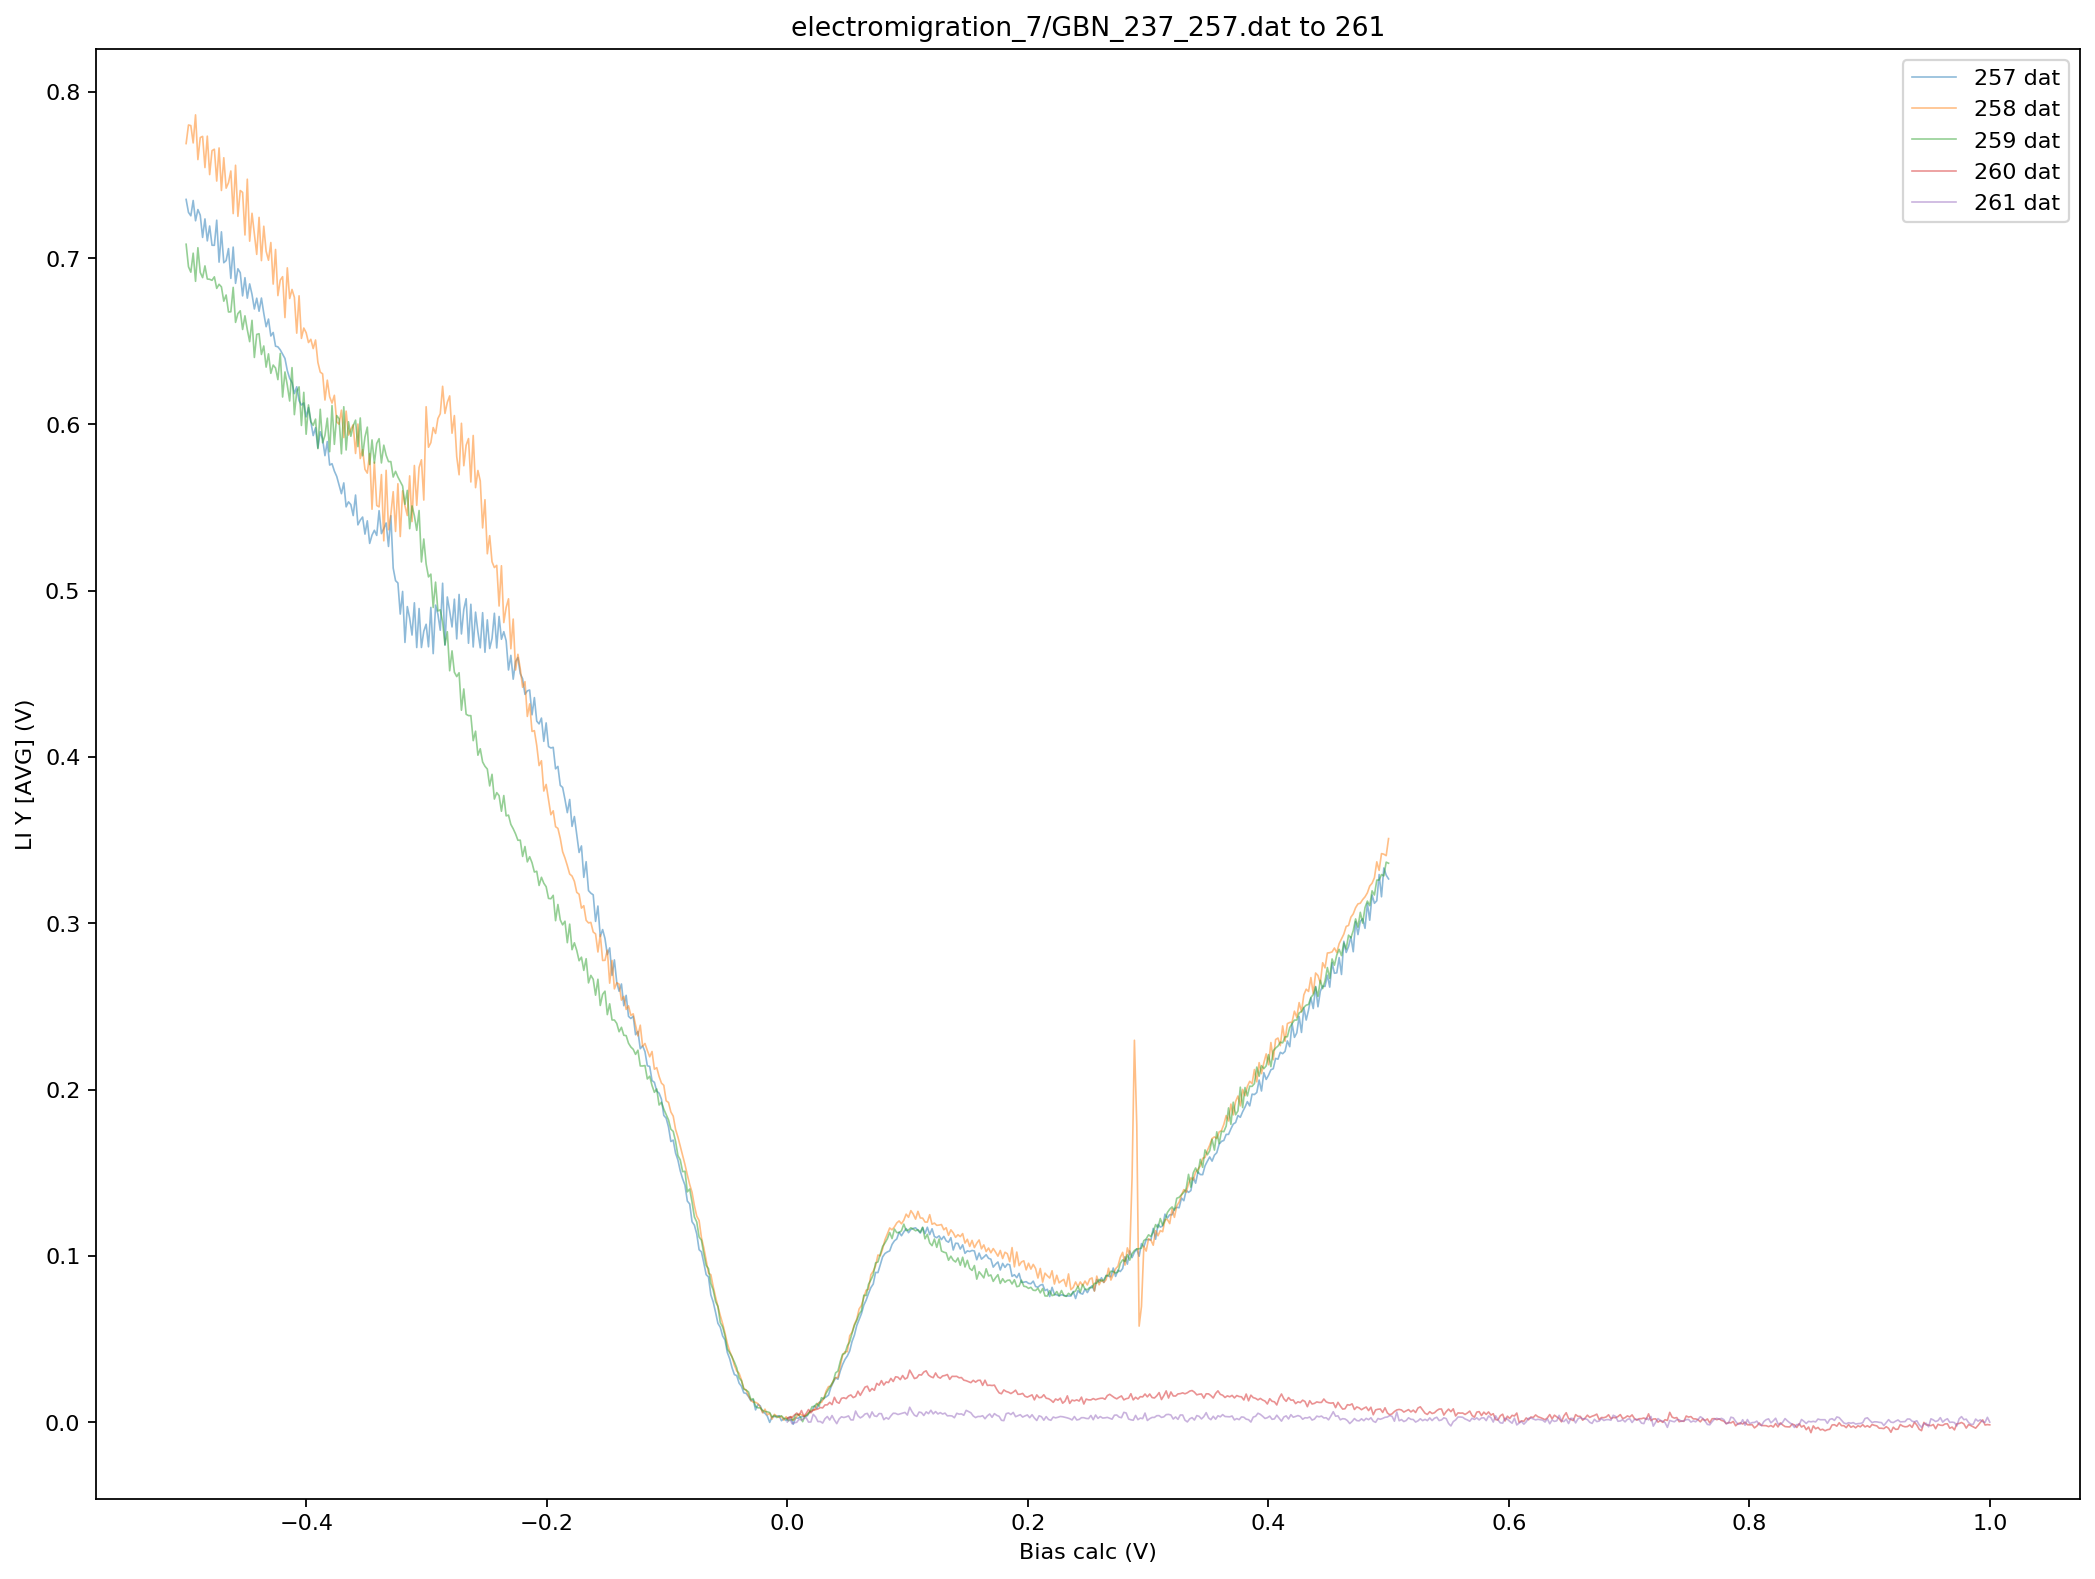

In [75]:
import math
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(num=None, figsize=(16, 12), dpi=160)
ax = fig.add_subplot(111)
plt.title(PATH + str(N_RANGE[0]) + ".dat to " + str(N_RANGE[1] - 1))
i = 0
j = 0
col = plt.cm.jet(np.linspace(0, 1, 101)) 
for file, height in zip(files, heights):
    with open(file,'r') as f:
        for i in range(70): # 70 for .dat, 8 for transport__.dat
            next(f) # skip first row
        df = pd.read_table(f)
        df = df.astype('float64')
#         col_j = math.floor((volts[j] - volts[0]) / (volts[-1] - volts[0]) * 100)
        if "LI Y [AVG] (V)" in df.keys():
#             ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=0.75, label=names[j], ax=ax, alpha=0.5)
        else:
#             ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=0.75, label=names[j], ax=ax, alpha=0.5)

#         cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
#         cb1 = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap, norm=norm, orientation='vertical')
#         cb1.set_label('Gate Voltage')
        j += 1